# Lab 5

In [4]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

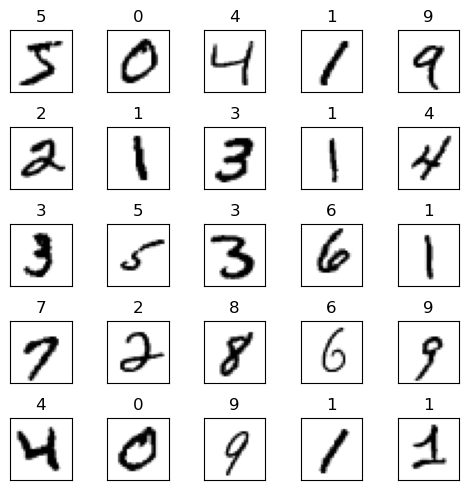

In [3]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5,5))

axes = axes.flatten()

for i in range(25):
    axes[i].imshow(X_train[i], cmap='binary')

    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(str(y_train[i]), color='black')
    
plt.tight_layout()
plt.show()

##  Normalize data

### Train data

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32') / 255

In [6]:
X_train.shape

(60000, 784)

### Test data

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255

In [9]:
X_test.shape

(10000, 784)

##  Prepare Results

In [10]:
from keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Building Sequantial model

### Define model

In [12]:
from keras import models
from keras import layers

In [13]:
network = models.Sequential()

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

### Compile Network

In [14]:
network.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics = ['accuracy'])

### Train Model

In [15]:
network.fit(X_train, y_train, epochs = 7, batch_size = 128)

Epoch 1/7
469/469 [==============================] - 3s 4ms/step - loss: 0.2547 - accuracy: 0.9268
Epoch 2/7
469/469 [==============================] - 2s 4ms/step - loss: 0.1014 - accuracy: 0.9693
Epoch 3/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0674 - accuracy: 0.9801
Epoch 4/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0493 - accuracy: 0.9849
Epoch 5/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0366 - accuracy: 0.9888
Epoch 6/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0280 - accuracy: 0.9916
Epoch 7/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0214 - accuracy: 0.9936


### Test Model

In [16]:
tes_loss, test_acc = network.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0680 - accuracy: 0.9803


### Save Model

In [17]:
network.save('digits_recognition.h5')

# Work with model

In [7]:
from keras.models import load_model
import numpy as np
model = load_model('digits_recognition.h5')

In [8]:
import cv2

1/1 [==============================] - 0s 24ms/step


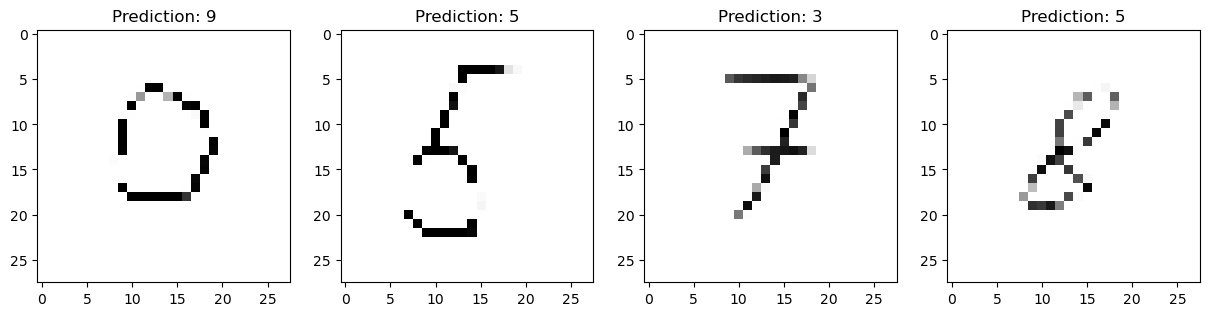

In [9]:
imgs = ['0', '5', '7', '8']

fig, axs = plt.subplots(1, len(imgs), figsize=(15, 5))

for i, img in enumerate(imgs):
    test_img = 255 - cv2.imread('test_imgs/' + img + '.jpg', 0)
    test_img = cv2.resize(test_img, (28, 28))

    axs[i].imshow(test_img, cmap='binary')
    axs[i].set_title(f"Prediction: {np.argmax(model.predict(test_img.reshape(1, 28*28)/255))}")

plt.show()


1/1 [==============================] - 0s 86ms/step


5